# World Happyness Report - The Course No1 Project


## A. Importing, cleaning and numerical summaries

### Load and analyze the data

First, we build a pandas dataframe object by loading the data.csv file. This will require to import the `pandas` library.

The `os` library is needed to build the path to the CSV data file without worrying about filename conventions of the underlying Operating System used.

In [1]:
import os
import pandas as pd

datafile_path = os.path.join('data','data.csv')

df = pd.read_csv(datafile_path)


Now it's time to grab some informations from this freshly loaded dataframe.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


This dataframe is made of a total of 12 columns and 153 lines.

Columns types are floats (values of the observations), integer (for the country rank) and 2 generic types (Country names and Regions)

The df.info() indicates that _Job Satisfaction_ is missing two values (151 entries over 153 lines in the CSV file).

According to what it is expected in this project, we will remove the lines that are missing data. We will use the `dropna()`function which basically remove lines that are missing at least one value in any of its cells.

_Do not forget to use the `inplace=True` parameter to update the current dataframe_



In [3]:
df.dropna(inplace=True)

Here is now the count of lines in the dataframe for each column. We can confirme that we do not have any empty cells, each column has a count value set to 151 (we've dropped the two lines where _Job Satisfaction_ value was not set).

In [4]:
df.describe().loc[['count']]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.0,151.0,151.0,151.0,151.0,151.0,151.0,151.0,151.0,151.0


---
### Reindex the dataset

Displaying a few lines of the dataframe using a `df.head(5)` function call, we can see that index could be rearranged using the Country Name.
This can be easily done using the following code.

_Again, do not forget the `inplace=True` to update the currentdataframe_



In [5]:
df.set_index('Country',inplace=True)
df.head(3)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe


At that point, our dataframe contains 11 column as the `'Country'` one became its index.

In [6]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction',
       'Region'],
      dtype='object')

---
### Grab some stats

Basic statistics values of the data can be obtain using the `describe()` function.

We can quickly restrict the statistcs displayed to the mean, the min and the max values of each numerical columns using the `.loc()`function.

In [7]:
df.describe().loc[['mean','min','max']]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


Using the `sort_values` methohd of the `Dataframe` object, we can easily get the top 10 happiest conuntries, as well as the 10 least happy countries.

#### Top 10 happiest countries

In [8]:
df.sort_values('Happiness Rank').head(10)['Happiness Rank'].to_frame()

,Happiness Rank
Country,
Norway,1
Denmark,2
Iceland,3
Switzerland,4
Finland,5
Netherlands,6
Canada,7
New Zealand,8
Sweden,9


#### 10 least happiest countries

In [9]:
df.sort_values('Happiness Rank',ascending=False).head(10)['Happiness Rank'].to_frame()

,Happiness Rank
Country,
Central African Republic,155
Burundi,154
Tanzania,153
Syria,152
Rwanda,151
Togo,150
Guinea,149
Liberia,148
Yemen,146


---
##  B. Indexing and grouping

### Export data by Region into CSV files

In this part of the project, we have to handle data grouped by _Region_.

I've decided to build an hash table of _Dataframe_ objects, one for each _Region_. The hash keys are made of the name of the _Region_.

Note: I use a Python `set()` object to build the list of _Region_. Python `set()` object can be used to build unique index values from arrays.

In [10]:
region_dict = set(df['Region'].to_list())
df_by_region = dict()

for i in region_dict:
    print("Processing region",i,"=>",os.path.join('data',i+'.csv'))
    df_by_region[i] = df[df['Region'] == i]
    df_by_region[i].to_csv(os.path.join('data',i+'.csv'),encoding='UTF-8')
    


Processing region Africa => data/Africa.csv
Processing region Western Europe => data/Western Europe.csv
Processing region Latin America => data/Latin America.csv
Processing region Eastern Europe => data/Eastern Europe.csv
Processing region Europe => data/Europe.csv
Processing region North America => data/North America.csv
Processing region Asia-Pacific => data/Asia-Pacific.csv


The `df_by_region`variable is now a dict of Dataframe, indexed by the region name it concerns


### Mean happiness score for each region, rank the regions from most happy to least happy.

Even if we could use our `df_by_region` dict object to get this ranking, we will use `pandas`library functions.

We use the `groupby()` method of the Datafram class to get a DataFrameGroupBy object. This object has a `mean()` method to calculate the mean values of grouped lines. Playing with the `ascending` parameter let us get the list sorted from most to least happy.

For smarter result, we do select only values from column _Happiness Rank_


In [11]:
df.groupby('Region').mean().sort_values('Happiness Rank',ascending=False)['Happiness Rank'].to_frame()

,Happiness Rank
Region,
Europe,132.000000
Africa,122.116279
Asia-Pacific,78.325581
Eastern Europe,70.619048
Latin America,50.772727
Western Europe,20.000000
North America,10.500000


### Happiness score above 6.0.

The question here is to get the number, per Region, of countries with a _Happiness Score_ above 6.0.

First, we build an array of Boolean value depending on the score of each countries. If score is above 6.0, then the corresponding array index is set to True, False otherwise.
This array is then used as paramter to select the corresponding lines of the dataset.

Now, we use once again the `groupby()` method with the `sum()` function to get the number of countries per _Region_ with an _Happiness Score_ above 6.0.

One note here for presentation purposes, we do rename the column to obtain a more precise output.

In [12]:
above = [True if x > 6.0 else False for x in df['Happiness Score']]
above_df = df[above].groupby('Region').count()['Happiness Score'].to_frame()
above_df.columns = ['Number of countries with Happiness Score above 6.0']
above_df

,Number of countries with Happiness Score above 6.0
Region,
Asia-Pacific,11
Eastern Europe,1
Latin America,13
North America,2
Western Europe,17


### Difference between the maximum and minimum happiness

Again, to get the difference between the min and max _Happiness Score_ per region, we will use the `groupby()` method, along with a call to `agg()` method. Parameter of `agg()` will be a function that calculates the max minus min value found in grouped lines.

The result converted to a Dataframe with method `to_frame()` will be sorted by values _Happiness Score_ in reversed order (higher number first) using the method `sort_values()` with parameter `ascending=False`.

Displaying this new Dataframe gives us the difference, per _Region_, of the min and max _Happiness Score_, with the largest range as first entry: _Asia-Pacific_ 

In [13]:
difference_df = df.groupby('Region')['Happiness Score'].agg(lambda x: max(x) - min(x)).to_frame()
difference_df.sort_values('Happiness Score',ascending=False)

,Happiness Score
Region,
Asia-Pacific,3.852
Latin America,3.476
Africa,3.179
Western Europe,2.342
Eastern Europe,1.454
North America,0.323
Europe,0.000


---

## C. Bar plot of the Happiness Score

Now it's time to start drawing some graphs.

First of all, let import he libraries needed for ploting functions.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's draw a nice Horizonal Bar Plot of Happiness Score.

Data displayed will be restricted to the top 10 happiest countries, using the `head()` method.

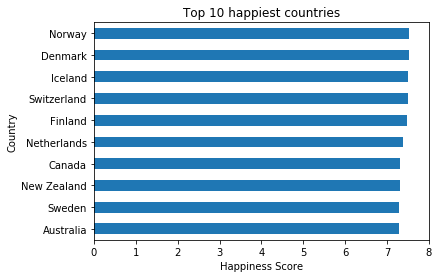

In [15]:
top10_df = df.sort_values('Happiness Rank',ascending=True).head(10)

top10_plot = top10_df['Happiness Score'].plot.barh()
top10_plot.set_xlabel('Happiness Score')
top10_plot.invert_yaxis()

top10_plot.set_title('Top 10 happiest countries')

plt.xlim((0,8))
plt.show()


---
### Stacked bar graph of the top 10 happy countries
Now we do some changes the previous code to turn our horizontal bar graph into a stacked bar chart where the overall happiness score is divided into the seven category corresponding to the columns.

To do the job, we will initialize a _Top 10_ dataframe object and two arrays: First one contains the 7 categories to be used for Bar graph, the other one contains the 7 colors, one for each category.


In [16]:
top10_df = df.sort_values('Happiness Score',ascending=False).head(10)

categories = ['Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia']
colors = ['Red','Green','Blue','Yellow','Pink','Black','Grey']


The `plt.barh()` method expect as first parameter the x-axis values. Those values are imply built using a range of value starting from 0 to length of Dataframe index (the number of lines). In our specific case, this value sould be hardcoded to 10 as we've limited previously the Dataframe entries to 10 lines.

Now, on a stacked bar graph, we must handle a left offset for each categories. As I've mead the choice to use a `for` loop to build the graph, I will initalize a `left_offset` arrays with 0 value, and use this array as `letf=left_offset` parameter to the `plt.barh()` method. On each loop, Il'' add to this array the values of the current category.

In [17]:
x_values = range(0,len(top10_df.index))
left_offset = [0] * len(top10_df.index)

Let's now loop over the categories and build the Bar graph and add some smart decorations to the graph...

...and that'all folks :-)

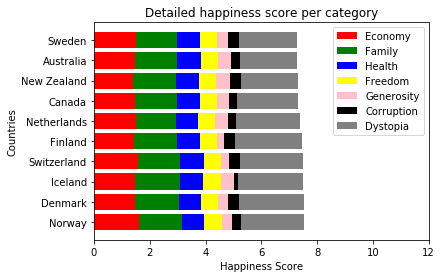

In [18]:
i = 0
for category in categories:
    to_draw = top10_df[category]
    plt.barh(x_values,to_draw, color=colors[i], left = left_offset, label = category)
    left_offset = left_offset + to_draw
    i = i + 1

    plt.yticks(x_values,top10_df.index)
    
plt.xlim((0,12))

plt.ylabel("Countries")
plt.xlabel("Happiness Score")
plt.title("Detailed happiness score per category")
plt.legend(loc='upper right')

plt.show()

---
### Stacked bar graph of countries from Africa

This bar graph construction follows the same kind of logic of the previous one (array of categories and colors are reused from previous code). Main differences are:
* Source Dataframe needs to be changed to filter coiuntries from Africa
* `x_values` and `left_offset` must be set to new value (index of African countries is different from previous top 10 graph)
* Graph size will be set bigger than previous one as there is more bar to be displayed
* Sorting order of the dataframe is changed to `ascending=False` in order to have the most happy country on top

Note that we use here the previously built `df_by_region` dict which contains _Dataframes_ per region name.

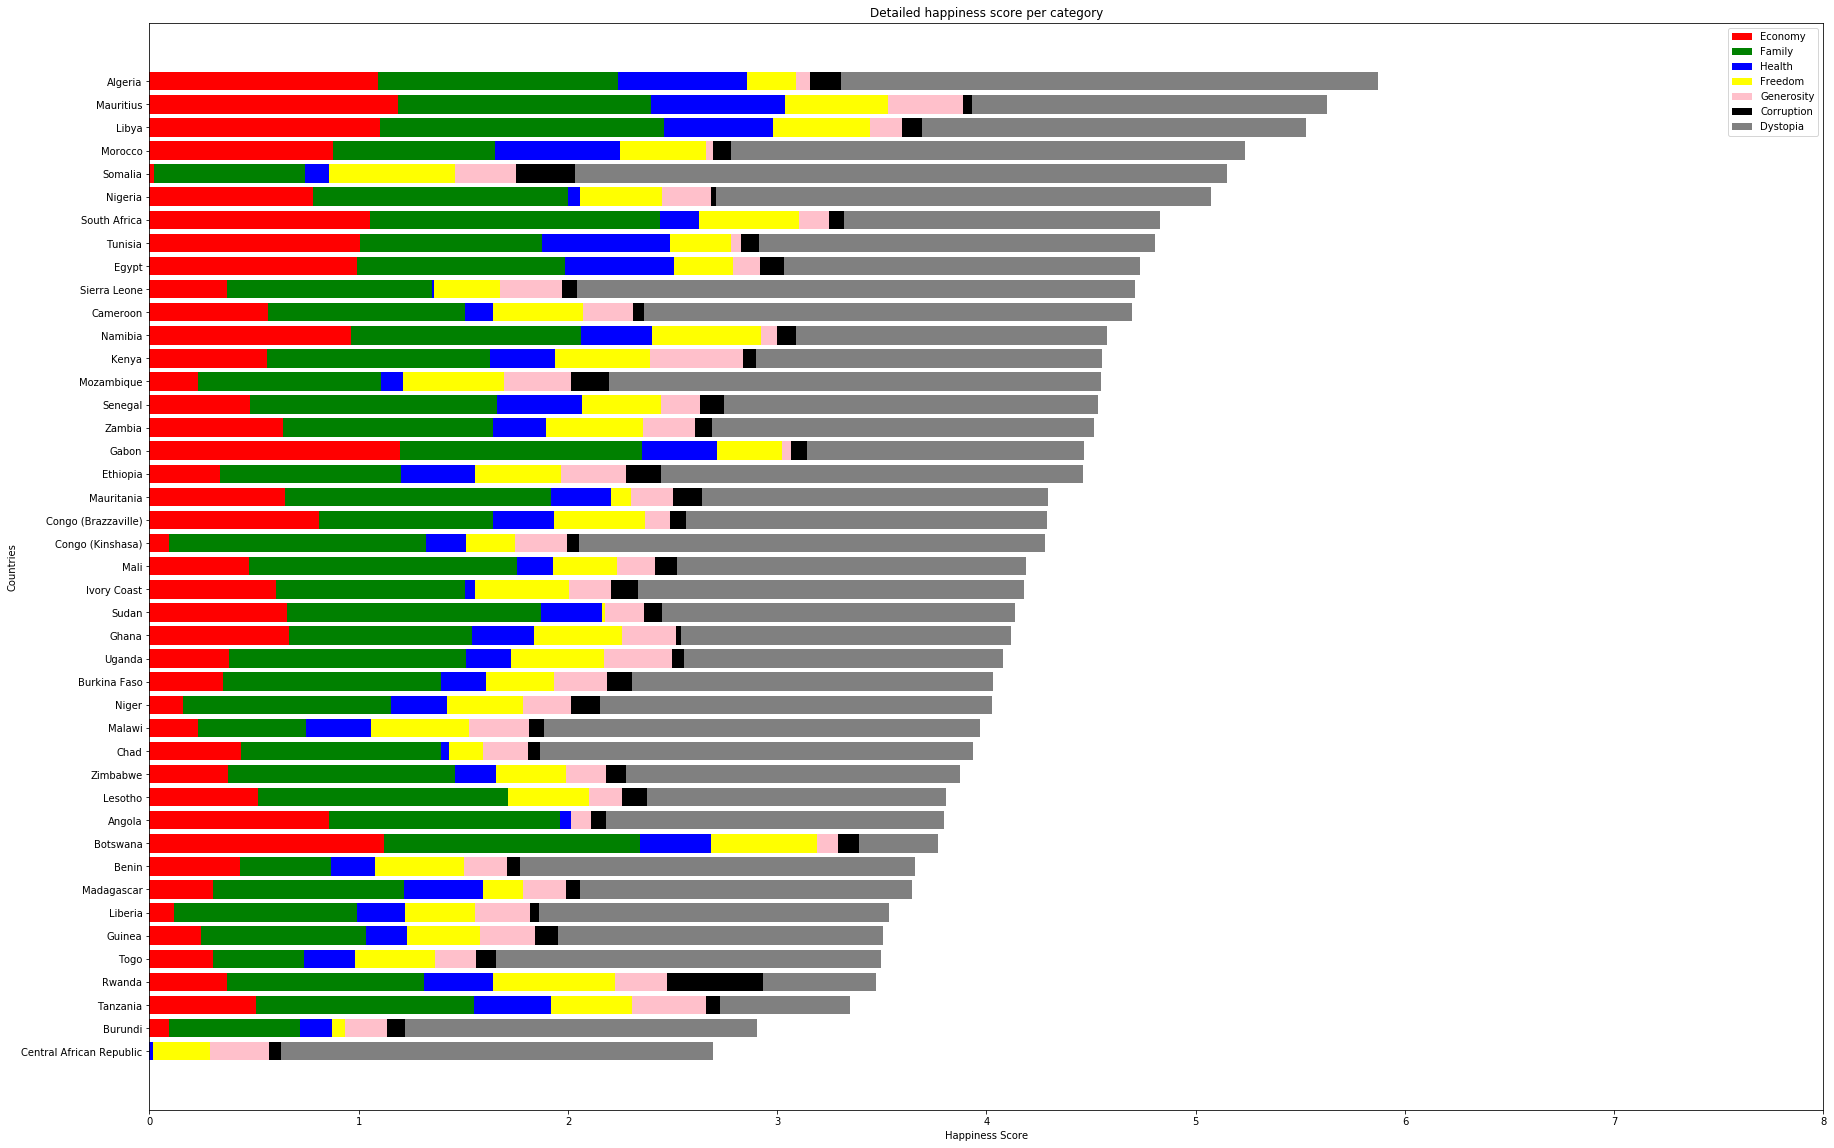

In [19]:

africa_df = df_by_region['Africa']
africa_df = africa_df.sort_values('Happiness Rank',ascending=False)

x_values = range(0,len(africa_df.index))
left_offset = [0] * len(africa_df.index)

plt.figure(figsize=(30,20))

i = 0
for category in categories:
    to_draw = africa_df[category]
    plt.barh(x_values,to_draw, color=colors[i],left = left_offset, label = category)
    left_offset = left_offset + to_draw
    i = i + 1


plt.yticks(x_values,africa_df.index)
plt.xlim((0,8))

plt.ylabel("Countries")
plt.xlabel("Happiness Score")
plt.title("Detailed happiness score per category")
plt.legend(loc='upper right')

plt.show()


## D. Histogram of Job Satisfaction

Histogram of _Job Satisfaction_ can be easily drawn using the `plot.hist()` method.

This method accepts a parameter named `bins` which can be used to set the number of bins to use for an histogram. Instead of bins number, we can use an array of values that will be used as _bins_.

Using an array like `[40, 50, 60, 70, 80, 90, 100]` to set the `bins` parameter will build the histogram we are looking for.

Note that I've decided to limit the x-axis range to [40-100] unsing the `plt.xlim()` method for smarter display.

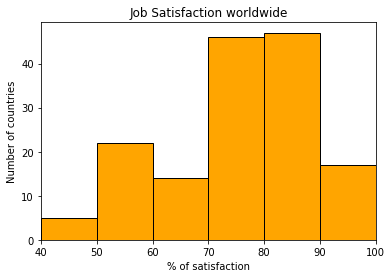

In [20]:
job_satisfaction_df = df['Job Satisfaction'].copy()
bins_interval = [40, 50, 60, 70, 80, 90, 100]

hist = job_satisfaction_df.plot.hist(color='orange', edgecolor='black',bins=bins_interval)
hist.set_xlabel('% of satisfaction')
hist.set_ylabel('Number of countries')
hist.set_title('Job Satisfaction worldwide')

plt.xlim(40,100)
plt.show()


---
## E. Pairwise Scatter plots

The trick here is to draw _Scatter Plot_ graphs of the _Happiness Score_ versus each of the other variables, in one command only.

I've decided to use a _PairGrid_ object from the _Seaborn_ library. This object expose the `map()` method that will, for each category defined in the _PairGrid_ object, apply a plotting function to draw graphs. This is my 'One Command' instruction to build all the _Scatter Plots_

First we do import the _seaborn_ library

In [21]:
import seaborn as sns

Then we define the array of _Category_ we'd like to draw against the _Happiness Score_

In [22]:
categories=['Job Satisfaction','Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia']

And finally we build the _PairGrid_ object and call the `map()`method.

I've also added a call to the `set()` method to redefine limit and ticks of the y-axis

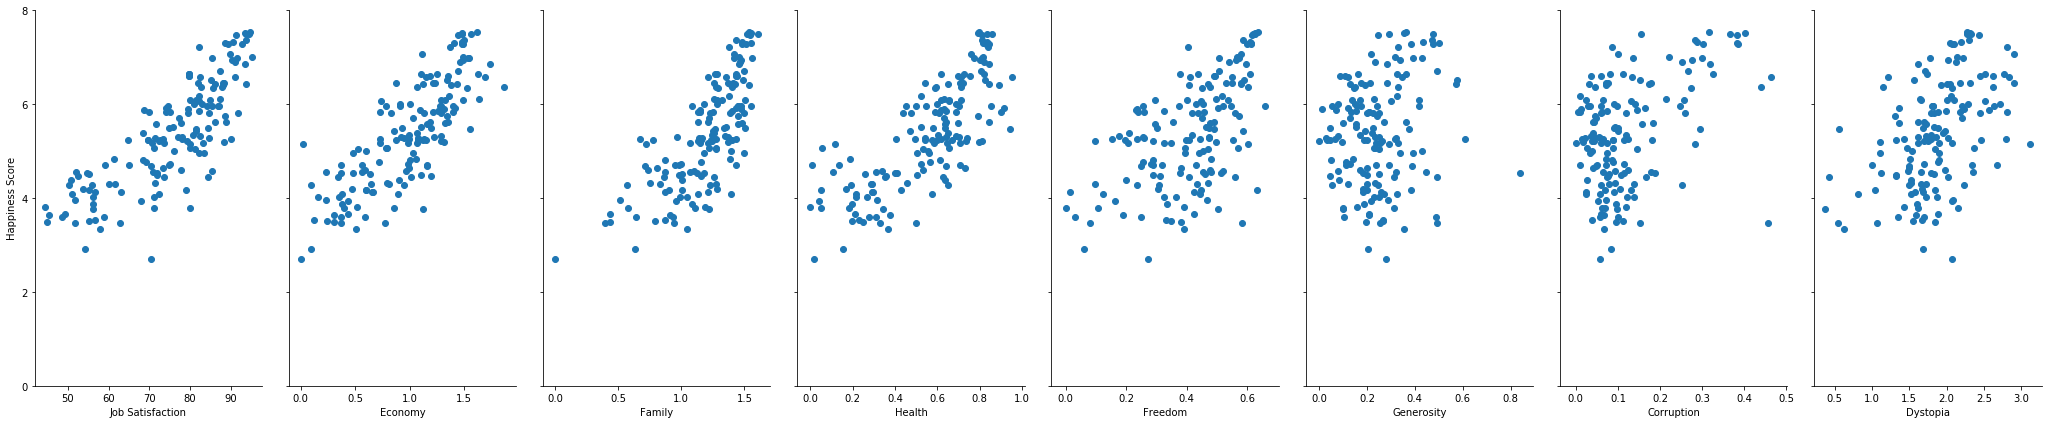

In [23]:
g = sns.PairGrid(df,y_vars=["Happiness Score"], x_vars = categories, height=6, aspect=0.6)

g.map(plt.scatter);

g.set(ylim=(0, 8), yticks=[0, 2, 4, 6, 8]);



---
## F. Correlation

Correlation between _Happiness Score_ and other variables is simply obtained using the `corr()` method of _Dataframe_ class.

This method builds a square matrix, with column and rows being the column of the _Dataframe_, and calculate for each cell the correlation factors of the row and column it concerns.

This matrix is returned as a new Dataframe instance.

Selecting the _Happiness Score_ column of this newly created Dataframe and sort it by values gives us the variable which has the highest correlation with _Happiness Score_. The category we are looking for is the second entry, the first one is the correlation of _Happiness Score_ by itself, which is by definition the highest correlation factor.

The highest correlation with _Happiness Factor_ is the _Job Satisfaction_ variable.

Note: I've choosen the _Pearson_ algorythm to calculate the correlation between variables.

In [24]:
correlation_df = df.drop('Happiness Rank',axis=1).corr(method='pearson')

correlation_df['Happiness Score'].to_frame().sort_values('Happiness Score', ascending=False)


,Happiness Score
Happiness Score,1.000000
Job Satisfaction,0.812873
Economy,0.808678
Health,0.777731
Family,0.749612
Freedom,0.567948
Dystopia,0.481117
Corruption,0.438262
Generosity,0.164123


---
## G. Probabilities

We would like to compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe.

The question here is to find the probability of randomly select a _Country with Happiness > 6.0 AND from Western Europe_

This probability is (Country with Happiness > 0 AND from Western Europe) / (Total number of Conutries)

We can used Pandas library to calculate values needed.


In [25]:

total_countries = df['Region'].count()
print("Total number of countries:",total_countries)

western_europe_df = df_by_region['Western Europe']

total_above_6_in_western_europe = western_europe_df[western_europe_df['Happiness Score'] > 6.0].count().loc['Happiness Score']
print("Total number of countries with happiness above 6.0 in Western Europe:", total_above_6_in_western_europe)


Total number of countries: 151
Total number of countries with happiness above 6.0 in Western Europe: 17


In [26]:
result = probability_above_6_in_western_europe = total_above_6_in_western_europe / total_countries * 100
print("Probability of randomly select a country in Western Europe AND a happiness score above 6.0:\n   {:.1f} %".format(result))


Probability of randomly select a country in Western Europe AND a happiness score above 6.0:
   11.3 %


---
## H. Matrices

Managing matrix in Python is easily done with the `numpy` library. So let's first import it in our Notebook.

In [27]:
import numpy as np

Next step, we will build a `matrix_df` Dataframe based only on the column _Region_ of our main Dataframe. The result will be a _one column_ Dataframe as we do not need informations from other columns.

In [28]:
matrix_df = df['Region'].to_frame()

And now we build the matrix. Here is the logic:

* We do a for loop based on our dict `region_dict` (created previously)
* For each region, we add a new column names by the current region into our Dataframe with values being calculated this way:
 * Boolean evaluation of the equality between the cell value and the current Region. This will give us an array of boolean
 * Multiply the boolean result by 1. This is a Python trick to convert boolean values to 0/1
* After the loop, we drop the column _Region_ (it is now useless)
* Finaly we convert the Dataframe to a Numpy Array using method `.to_numpy()`


In [29]:
for region in region_dict:
    matrix_df[region] = (matrix_df['Region'] == region) * 1

matrix_df.drop(['Region'],axis=1,inplace=True)

matrix = matrix_df.to_numpy()


The matrix variable is now a reference to an `np.array` instance containing a matrix whose rows correspond to countries and the columns to the regions, filled with 0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

For verification purposes, we can display the dimension of the matrix using the `np.array.shape` tuple value. The matrix should have 151 rows, which are the 151 countries, and 7 columns which correspond to the 7 Region found in the main Dataframe.

In [30]:
print("Dimension of the matrix:",matrix.shape[0],"lines,",matrix.shape[1],"columns")
matrix

Dimension of the matrix: 151 lines, 7 columns


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

---
# That all Folks :-)
Thanks a lot for this very intresting first course.